In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
import os
import pandas as pd
import matplotlib.pyplot as plt
import statistics

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.width', None)

In [3]:
file_input = r"C:\Users\alber\Downloads\round-3-island-data-bottle\prices_round_3_day_2.csv"
window_size = 20
df = pd.read_csv(file_input, sep=';').copy()
df.set_index('timestamp', inplace=True)
df.head()

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
timestamp,,,,,,,,,,,,,,,,
0,2,ROSES,14421,27,14420.0,35.0,NaN,NaN,14422,62,NaN,NaN,NaN,NaN,14421.5,0.0
0,2,STRAWBERRIES,4036,255,NaN,NaN,NaN,NaN,4037,255,NaN,NaN,NaN,NaN,4036.5,0.0
0,2,CHOCOLATE,7888,123,NaN,NaN,NaN,NaN,7890,123,NaN,NaN,NaN,NaN,7889.0,0.0
0,2,GIFT_BASKET,70593,1,70592.0,10.0,70591.0,27.0,70604,1,70605.0,10.0,70606.0,27.0,70598.5,0.0
100,2,CHOCOLATE,7889,102,NaN,NaN,NaN,NaN,7890,48,7891.0,54.0,NaN,NaN,7889.5,0.0


In [6]:
roses_df = df[df['product'] == 'ROSES'].copy()
strawberries_df = df[df['product'] == 'STRAWBERRIES'].copy()
chocolate_df = df[df['product'] == 'CHOCOLATE'].copy()
gift_basket = df[df['product'] == 'GIFT_BASKET'].copy()
gift_basket['individual_price'] = 4*chocolate_df['mid_price'] + 6*strawberries_df['mid_price'] + roses_df['mid_price']
gift_basket['delta'] = gift_basket['mid_price'] - gift_basket['individual_price']
statistics.mean(gift_basket['delta'])

386.29905

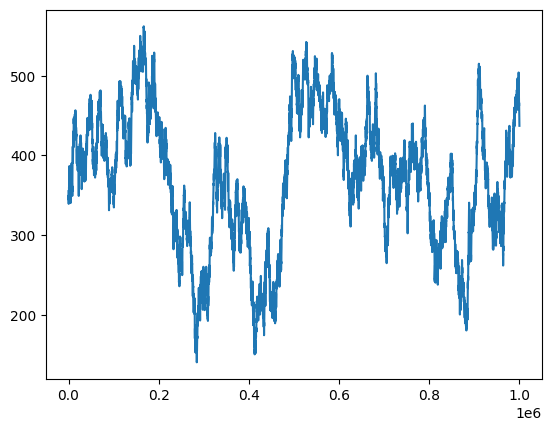

In [30]:
plt.figure()
plt.plot(gift_basket.index, gift_basket['delta'])
plt.show()